# Hierarchical Clustering

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from __future__ import division
import numpy as np
# from keras.models import Sequential
# from keras.layers.core import Dense
# from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
# import theano
import cv2
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/peternygaard/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Perform hierarchical clustering on observations (columns)

In [451]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
import scipy.spatial.distance as ssd
from faker import Factory

fake = Factory.create()
colorList = []

for i in range(5000):
    colorList.append(fake.hex_color())

set_link_color_palette(colorList)

df = pd.read_csv('know_your_y.csv')
# df = df[df['Yr'] >= 2011]
# df = df[df['AST%'] <= 15]
# df = df[df['Pos'] != 'C']
# df = df[df['Pos'] != 'PF']
# df = df[df['Pos'] != 'PG']
df.reset_index(inplace=True, drop=True)

df['Player_ID'] = df['Player_ID'].astype(int)

y = np.array(df['OBPM 3-4-5'].values)
pid = np.array(df['Player_ID'].values)
yr = np.array(df['Yr'].values)
images = []
for i in range(len(pid)):
    images.append(cv2.imread('thumbnails/thumbnail_{0}_{1}-{2}.png'.format(str(pid[i]), str(yr[i]-1), str(yr[i])[-2:]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)

/Users/peternygaard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


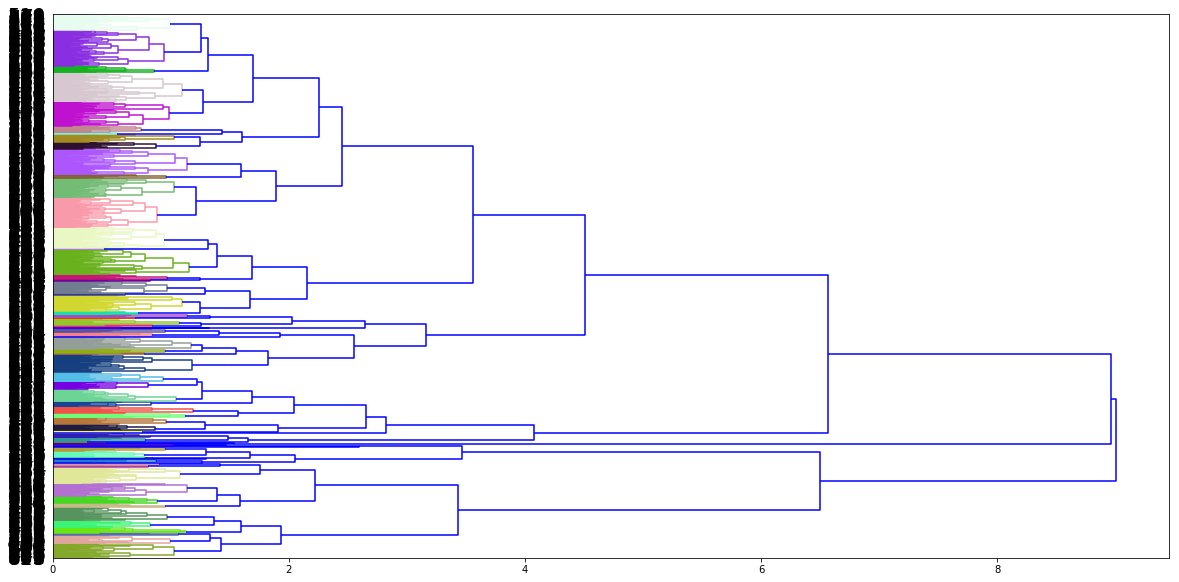

In [452]:
# Create distance matrix on columns using cosine distance
# convert the redundant n*n square matrix form into a condensed nC2 array
dist = ssd.squareform(pdist(X, 'cosine'))
clust = linkage(dist, method='complete')

fig, ax = plt.subplots(figsize=(20,10))
_ = dendrogram(clust, color_threshold=1.2, orientation='right', ax=ax)
_ = plt.xticks(fontsize=10)
_ = plt.yticks(fontsize=20)

In [453]:
R = dendrogram(clust,
                color_threshold=1.2, no_plot=True)

In [454]:
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

lineups = get_cluster_classes(R)

In [455]:
lineups

#83a82a,"['756', '819', '689', '872', '268', '460', '334', '446', '533', '651', '982', '359', '689', '516', '904', '845', '206', '673', '374', '122', '412', '424', '900', '139', '435', '50', '955', '139']"
#e1a69b,"['66', '500', '293', '355', '832', '257', '416', '140', '552', '890', '23', '385', '26', '81', '120']"
#5a68b8,"['322', '346', '885', '60']"
#68e614,"['292', '777', '222', '609', '196', '368', '378', '407', '108', '349']"
#3bf476,"['459', '925', '339', '472', '893', '820', '94', '192', '358', '582', '717', '813', '541']"
#57945d,"['622', '896', '199', '613', '522', '588', '986', '304', '688', '345', '465', '24', '715', '291', '946', '691', '725', '150', '458', '381', '307', '569', '525', '799']"
#c6b887,"['51', '476', '19', '544', '72', '76', '592']"
#46d724,"['778', '824', '428', '44', '218', '405', '928', '45', '227', '870', '34', '693', '682']"
#b270d0,"['624', '779', '971', '351', '430', '33', '290', '659', '279', '821', '947', '107', '463', '373', '675', '312', '80', '540', '10', '102', '905', '764', '656']"
#e0e798,"['437', '827', '418', '610', '158', '871', '214', '243', '660', '984', '585', '780', '803', '855', '299', '647', '15', '176', '92', '973', '399', '468', '690', '728', '177', '509', '4', '286', '178', '217']"
#b13da6,"['296', '977', '800']"


In [457]:
thing = []

for ok in range(len(list(lineups.values()))):
    comps = list(lineups.values())[ok]

    for i in comps:
#         thing.append([df['Player'][int(i)], df['Age'][int(i)], ok, df['OBPM'][int(i)], df['OBPM 3-4-5'][int(i)], df['AST%'][int(i)], df['AST% 3-4-5'][int(i)]])
         thing.append([df['Player'][int(i)], df['Pos'][int(i)], df['Yr'][int(i)], df['Age'][int(i)], ok, df['OBPM'][int(i)], df['OBPM 3-4-5'][int(i)], df['AST%'][int(i)], df['AST% 3-4-5'][int(i)], df['FTr'][int(i)], df['STL%'][int(i)], df['ORB%'][int(i)], df['BLK%'][int(i)], df['USG%'][int(i)]])
    loadout = pd.DataFrame(thing)
#     loadout.rename(columns={0:'Player', 1: 'Age', 2: 'Cluster', 3: 'OBPM', 4:'OBPM 3-4-5', 5: 'AST%', 6:'AST% 3-4-5'},inplace=True)
    loadout.rename(columns={0:'Player', 1: 'Pos', 2: 'Year', 3: 'Age', 4: 'Cluster', 5: 'OBPM', 6:'OBPM 3-4-5', 7: 'AST%', 8:'AST% 3-4-5', 9:'FTr', 10:'STL%', 11:'ORB%', 12:'BLK%', 13:'USG%'},inplace=True)
    loadout = loadout.sort_values('OBPM 3-4-5', ascending=False)
    loadout.reset_index(inplace=True, drop=True)
    print(loadout)
    print('------------')

dx = pd.DataFrame(thing)
# dx.rename(columns={0:'Player', 1: 'Age', 2: 'Cluster', 3: 'OBPM', 4:'OBPM 3-4-5', 5: 'AST%', 6:'AST% 3-4-5'},inplace=True)
dx.rename(columns={0:'Player', 1: 'Pos', 2: 'Year', 3: 'Age', 4: 'Cluster', 5: 'OBPM', 6:'OBPM 3-4-5', 7: 'AST%', 8:'AST% 3-4-5', 9:'FTr', 10:'STL%', 11:'ORB%', 12:'BLK%', 13:'USG%'},inplace=True)

                 Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0         Carlos Boozer    4  2003   21        0   0.3         2.7   9.3   
1        Antawn Jamison    3  1999   22        0  -1.1         2.2   5.9   
2   Shareef Abdur-Rahim    4  1997   20        0  -0.8         1.6  12.1   
3         Zach Randolph    4  2003   21        0   0.6         0.0   5.7   
4           Jeff Foster    5  2001   24        0  -2.5        -0.3   4.6   
5           Mikki Moore    5  2001   25        0  -2.7        -1.1   4.6   
6      Rasho Nesterovic    5  2000   23        0  -2.3        -1.2   7.8   
7        Timofey Mozgov    5  2011   24        0  -4.0        -1.4   4.2   
8             Ike Diogu    4  2006   22        0  -2.0        -1.4   4.9   
9            JJ Hickson    5  2009   20        0  -4.7        -1.7   2.1   
10        Jason Maxiell    5  2007   23        0  -3.0        -1.7   2.5   
11       Stromile Swift    4  2001   21        0  -3.4        -2.0   3.5   
12          

                  Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0            Elton Brand    4  2000   20       10   1.3         3.3  11.8   
1          Blake Griffin    4  2011   21        1   2.2         3.0  18.7   
2             Tim Duncan    4  1998   21        5   1.8         2.8  13.7   
3            Steve Novak    4  2009   25       13   1.6         2.7   5.8   
4          Carlos Boozer    4  2003   21        0   0.3         2.7   9.3   
5         Antawn Jamison    3  1999   22        0  -1.1         2.2   5.9   
6            Brad Miller    5  2000   23        9   0.0         2.2   7.8   
7      Amar'e Stoudemire    4  2003   20        8  -1.6         2.1   5.0   
8         Antoine Walker    4  1997   20        2  -0.7         2.1  15.3   
9              Pau Gasol    5  2002   21        5   0.7         1.8  13.8   
10   Shareef Abdur-Rahim    4  1997   20        0  -0.8         1.6  12.1   
11        Brandan Wright    4  2009   21        4  -0.2         1.3   4.9   

                  Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0         Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
1        Peja Stojakovic    3  1999   21       26   0.2         3.4  10.8   
2            Elton Brand    4  2000   20       10   1.3         3.3  11.8   
3          Blake Griffin    4  2011   21        1   2.2         3.0  18.7   
4             Tim Duncan    4  1998   21        5   1.8         2.8  13.7   
5            Steve Novak    4  2009   25       13   1.6         2.7   5.8   
6          Carlos Boozer    4  2003   21        0   0.3         2.7   9.3   
7          Klay Thompson    2  2012   21       28   0.9         2.5  14.2   
8       Danilo Gallinari    3  2010   21       23   1.3         2.5   7.6   
9            Brad Miller    5  2000   23        9   0.0         2.2   7.8   
10        Antawn Jamison    3  1999   22        0  -1.1         2.2   5.9   
11        Antoine Walker    4  1997   20        2  -0.7         2.1  15.3   

                  Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0         Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
1            Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
2             Kevin Love    5  2009   20       31  -0.7         3.9   6.8   
3        Peja Stojakovic    3  1999   21       26   0.2         3.4  10.8   
4            Elton Brand    4  2000   20       10   1.3         3.3  11.8   
5          Blake Griffin    4  2011   21        1   2.2         3.0  18.7   
6             Tim Duncan    4  1998   21        5   1.8         2.8  13.7   
7           Andre Miller    1  2000   23       31   1.8         2.8  38.7   
8            Steve Novak    4  2009   25       13   1.6         2.7   5.8   
9          Carlos Boozer    4  2003   21        0   0.3         2.7   9.3   
10         Klay Thompson    2  2012   21       28   0.9         2.5  14.2   
11      Danilo Gallinari    3  2010   21       23   1.3         2.5   7.6   

                  Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0           Vince Carter    3  1999   22       45   2.1         5.9  17.2   
1         Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
2            Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
3           Derrick Rose    1  2009   20       43   0.9         5.1  28.8   
4      Russell Westbrook    1  2009   20       43   0.1         4.3  27.5   
5          Tracy McGrady    3  1998   18       43  -0.5         3.9  14.0   
6             Kevin Love    5  2009   20       31  -0.7         3.9   6.8   
7        Peja Stojakovic    3  1999   21       26   0.2         3.4  10.8   
8            Elton Brand    4  2000   20       10   1.3         3.3  11.8   
9          Blake Griffin    4  2011   21        1   2.2         3.0  18.7   
10            Tim Duncan    4  1998   21        5   1.8         2.8  13.7   
11          Andre Miller    1  2000   23       31   1.8         2.8  38.7   

                      Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0                 Chris Paul    1  2006   20       47   4.7         8.0  38.2   
1               LeBron James    2  2004   19       48   2.2         7.4  27.8   
2               Vince Carter    3  1999   22       45   2.1         5.9  17.2   
3             Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
4                  Ray Allen    2  1997   21       51   1.6         5.4  13.9   
5                Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
6               Derrick Rose    1  2009   20       43   0.9         5.1  28.8   
7              Manu Ginobili    2  2003   25       51   1.1         4.9  15.8   
8               Jimmy Butler    3  2013   23       48   0.9         4.6   8.6   
9              Allen Iverson    1  1997   21       50   3.4         4.4  33.6   
10         Russell Westbrook    1  2009   20       43   0.1         4.3  27.5   
11               Brandon Roy

                      Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0                 Chris Paul    1  2006   20       47   4.7         8.0  38.2   
1               LeBron James    2  2004   19       48   2.2         7.4  27.8   
2               Vince Carter    3  1999   22       45   2.1         5.9  17.2   
3             Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
4            Stephon Marbury    1  1997   19       52   2.0         5.4  38.1   
5                  Ray Allen    2  1997   21       51   1.6         5.4  13.9   
6                Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
7               Derrick Rose    1  2009   20       43   0.9         5.1  28.8   
8              Manu Ginobili    2  2003   25       51   1.1         4.9  15.8   
9              Ryan Anderson    4  2009   20       55  -0.1         4.7   6.4   
10              Jimmy Butler    3  2013   23       48   0.9         4.6   8.6   
11               Baron Davis

                   Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0              Chris Paul    1  2006   20       47   4.7         8.0  38.2   
1            LeBron James    2  2004   19       48   2.2         7.4  27.8   
2           Stephen Curry    1  2010   21       60   1.8         6.6  24.6   
3            Vince Carter    3  1999   22       45   2.1         5.9  17.2   
4            James Harden    2  2010   20       60   0.7         5.7  12.3   
5          Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
6               Ray Allen    2  1997   21       51   1.6         5.4  13.9   
7         Stephon Marbury    1  1997   19       52   2.0         5.4  38.1   
8          Gilbert Arenas    1  2002   20       62   2.3         5.2  24.8   
9             Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
10           Derrick Rose    1  2009   20       43   0.9         5.1  28.8   
11          Isaiah Thomas    1  2012   22       58   3.2        

In [458]:
keys = np.array(list(lineups.keys()))
uniqlo = np.where(keys == 'b')[0][0]
naCl = max(dx['Cluster']) - np.array(dx[dx['Cluster'] == uniqlo].index)[0]

for i in np.array(dx[dx['Cluster'] == uniqlo].index)[1:]:
    dx['Cluster'][i] = naCl + i

/Users/peternygaard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [459]:
dx = dx[~dx.duplicated()]
dx.reset_index(inplace=True, drop=True)

In [491]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

dgenx = dx[dx['OBPM 3-4-5'] >= -9]
# dgenx = dgenx[dgenx['Pos'] != 'C']
# dgenx = dgenx[dgenx['Pos'] != 'PF']
dgenx.reset_index(inplace=True, drop=True)

X = np.array(dgenx[['Age', 'Cluster', 'USG%', 'AST%']].values)
y = np.array(dgenx['OBPM 3-4-5'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)
regr = RandomForestRegressor(random_state=21, n_estimators=1000)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

In [492]:
regr.score(X_test, y_test)

0.2416712258823316

In [493]:
# X_tract = []

# for g in range(len(X_test)):
#     comsense = dgenx[dgenx['OBPM'] == X_test[g][0]]
#     comsense = comsense[comsense['AST%'] == X_test[g][1]]
#     comsense = comsense[comsense['Age'] == X_test[g][2]]
#     comsense = comsense[comsense['Cluster'] == X_test[g][3]]
#     X_tract.append(comsense.index[0])

# testers = dgenx.iloc[X_tract]
# testers['Proj. OBPM'] = regr.predict(X_test)
# testers.sort_values('Proj. OBPM', ascending=False)

In [494]:
future = dx[dx['OBPM 3-4-5'].isna()]
future.reset_index(inplace=True, drop=True)

X_future = np.array(future[['Age', 'Cluster', 'USG%', 'AST%']].values)

# future.iloc[np.where(regr.predict(X_future) < 2)].sort_values('OBPM', ascending=False)
future['Proj. OBPM'] = regr.predict(X_future)
future.sort_values('Proj. OBPM', ascending=False)

/Users/peternygaard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Player,Pos,Year,Age,Cluster,OBPM,OBPM 3-4-5,AST%,AST% 3-4-5,FTr,STL%,ORB%,BLK%,USG%,Proj. OBPM
25,Trae Young,1,2019,20,68,1.8,NaN,40.5,NaN,0.330,1.3,2.6,0.5,28.4,4.6379
15,Ben Simmons,1,2018,21,6,1.0,NaN,37.4,NaN,0.342,2.5,5.9,2.1,22.3,3.2753
148,Dennis Smith Jr.,1,2018,20,57,-1.5,NaN,29.5,NaN,0.188,1.7,2.6,0.8,28.9,3.1128
147,Luka Doncic,2,2019,19,57,2.9,NaN,31.6,NaN,0.409,1.6,4.0,0.9,30.5,2.8907
117,Emmanuel Mudiay,1,2016,19,52,-3.1,NaN,29.0,NaN,0.231,1.6,1.7,1.4,25.7,2.7817
141,De'Aaron Fox,1,2018,20,56,-2.8,NaN,24.6,NaN,0.245,1.7,1.8,0.9,23.4,2.3383
146,Donovan Mitchell,2,2018,21,57,1.3,NaN,19.4,NaN,0.218,2.2,2.3,0.9,29.1,2.0358
190,Devin Booker,2,2016,19,62,-0.6,NaN,15.8,NaN,0.295,1.0,1.4,0.8,23.0,2.0017
157,Jamal Murray,2,2017,19,59,-0.5,NaN,14.0,NaN,0.164,1.4,2.6,1.1,21.6,1.8043
7,Harry Giles III,4,2019,20,3,-3.0,NaN,15.2,NaN,0.261,1.8,8.1,2.3,23.2,1.7308


In [347]:
# df_cluster

In [284]:
# df_nocluster

Troy Brown Jr. 1.69
Justin Anderson 1.41
Paul Zipser 1.29
Sterling Brown 1.21
Jonathan Isaac 1.2
Stanley Johnson 1.0
Taurean Prince 0.94
Frank Mason 0.89
Troy Williams 0.85
Brandon Ingram 0.79
D.J. Wilson 0.78
Willy Hernangomez 0.78
Glenn Robinson III 0.77
Allonzo Trier 0.76
Chandler Hutchison 0.72
Terry Rozier 0.72
Isaiah Whitehead 0.69
Doug McDermott 0.66
Joe Young 0.65
Johnny O'Bryant III 0.64
Malik Beasley 0.62
Myles Turner 0.62
Jayson Tatum 0.6
Jawun Evans 0.6
Wes Iwundu 0.59
Justin Jackson 0.59
Royce O'Neale 0.57
Jarell Martin 0.57
Josh Jackson 0.57
Monte Morris 0.56
Kelly Oubre Jr. 0.56
Patrick McCaw 0.55
Keita Bates-Diop 0.54
Dorian Finney-Smith 0.52
Malcolm Brogdon 0.52
D'Angelo Russell 0.52
JaMychal Green 0.51
Emmanuel Mudiay 0.46
Bobby Portis 0.45
Joel Embiid 0.41
Alan Williams 0.41
Treveon Graham 0.41
Troy Daniels 0.39
Norman Powell 0.38
Josh Okogie 0.37
Jaylen Brown 0.36
Domantas Sabonis 0.36
Jonah Bolden 0.35
Daniel Theis 0.33
Cameron Payne 0.33
Zach Collins 0.33
Dennis S

In [352]:
df.columns

Index(['Player', 'Player_ID', 'Pos', 'Age', 'Exp', 'Tm', 'G', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'U2%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'Yr', 'AST% 3-4-5', 'OBPM 3-4-5'],
      dtype='object')